# Cluster Analysis

## Import Nessasery Libraries

In [274]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools as itl

## Define Statistic Methods

In [315]:
class StatsFuncs(object):    

    @staticmethod
    def normal(size, mean=0, var=1):
        """
        shape: numpy arrays, shape of the outut
        mean:  float mean of the normal distribution
        var: vatriance of the normal distribution
        """
        return np.random.normal(mean, var, size)

    @staticmethod
    def multivariate_normal(*args, **kwargs):
        """
        alias of numpy.random.multivariate_normal
        """
        return np.random.multivariate_normal(*args, **kwargs)
    
    @staticmethod
    def uniform(*args, **kwargs):
        """
        alias function of numpy.random.uniform
        """
        return np.random.uniform(*args, **kwargs)
            
    @staticmethod
    def choice(*args, **kwargs):
        """
        alias function of numpy.random.choice
        """
        return np.random.choice(*args, **kwargs)

## Generate Dataset

In [448]:
class Datasets(object):
    def __init__(self, cluster_num = 6):
        stats = StatsFuncs()
        size = 100
        self.cluster_num = cluster_num
        self.data = np.array([])
        
        
        for i in xrange(self.cluster_num):
            cluster_means = np.array([stats.choice(16), stats.choice(16)])
            cluster_vars = np.array([[stats.choice([1, 2]), 0], 
                                      [0, stats.choice([1, 2])]])
            if i == 0:
                self.data = stats.multivariate_normal(cluster_means,
                                                      cluster_vars,
                                                      size)
            else:    
                self.data = np.vstack((self.data, stats.multivariate_normal(cluster_means,
                                                                            cluster_vars,
                                                                            size)))

### What does data look like 

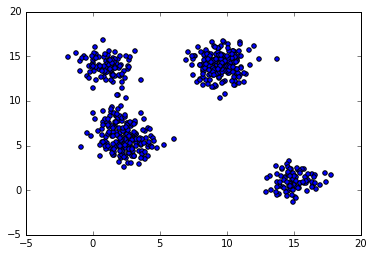

In [449]:
dataset = Datasets()
plt.scatter(dataset.data[:, 0], dataset.data[:, 1])
plt.show()

## Define KMeans Class

In [450]:
class KM(object):
    def __init__(self, type="vanilla"):
        self.type = type
        self.dataset = Datasets()
        self.data = self.dataset.data
        
        self.stats = StatsFuncs()

    def dist(self, c, data):
        """
        calculate distances between points x and y
        """
        dist = np.sqrt(((data - c) ** 2).sum(axis = 1))
        return dist

    def lloyd_routine(self, centers):
        """
        repeat routine mentioned in lloyd's algorithm
        """
        # get distances from different centers
        center_dists = np.array([self.dist(center, self.data) for center in centers])


        # get labels for all points
        labels =  [reduce(np.logical_and, [center_dists[j] <= center_dists[i] for i in xrange(len(center_dists))])
                   for j in xrange(len(center_dists))]

        # revaluate centers
        centers = [np.mean(self.data[label], axis=0) for label in labels]
        
        return centers, sum(center_dists).sum()
        
            
    def kmeans(self):
        # initialize centers in range (-4, 8) for x and y
        if self.type == 'vanilla': 
            centers = self.dataset.data[self.stats.choice(self.dataset.data.shape[0], 
                                               self.dataset.cluster_num, replace=False), :]
        elif self.type == 'kmeans++':
            pass
        traces = [centers]
        dists = []
        
        # calculate the distance between centers and all points
        for i in xrange(5):
            centers, dist = self.lloyd_routine(centers)
            traces.append(centers)
            dists.append(dist)
            
        return np.array(traces), np.array(dists)
    

### Run Vallina KMeans Algorithm

[329 171   3 494 177 293]
[[  6.13359624   8.5559937 ]
 [  0.79331299  14.1753577 ]
 [  4.90179342  10.60671487]
 [  4.87566859   8.8439036 ]
 [  3.51823699  14.57345826]
 [  6.6405227    9.29885073]]


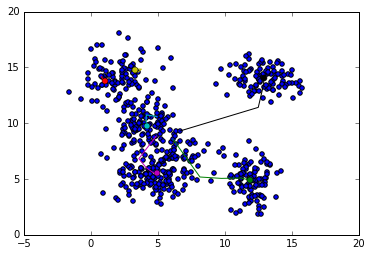

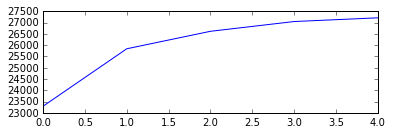

In [452]:

kmeans = KM() 
traces, dists = kmeans.kmeans()

fig = plt.figure()
centers_trace = fig.add_subplot(111)
centers_trace.scatter(kmeans.dataset.data[:, 0], kmeans.dataset.data[:, 1])

cycol = itl.cycle('grcmykw').next

assert kmeans.dataset.cluster_num < 8, 'number of color is not enough for number of clusters'

for i in xrange(kmeans.dataset.cluster_num):
    centers_trace.plot(traces[:, i, 0], traces[:, i, 1], cycol()) 

cycol = itl.cycle('grcmykw').next
for i in xrange(kmeans.dataset.cluster_num):
    centers_trace.plot(traces[-1, i, 0], traces[-1, i, 1], cycol() + 'o') 

fig = plt.figure()
dists_trace = fig.add_subplot(212)
dists_trace.plot(dists)
plt.show()

### Run KMoids